In [1]:
import tensorflow as tf
import keras
import numpy as np
import sys
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
from keras import optimizers

import utils as utils
import model as models

Using TensorFlow backend.


In [2]:
img_width = 480
img_height = 640
img_channels=1
output_dim=2
b_size=3
crop_width=256
crop_height=256

In [3]:
model = models.CNN(crop_width, crop_height, img_channels, output_dim)
print("Loaded Model")





__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 256, 256, 1)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 128, 128, 2)  20          input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 64, 64, 1)    19          conv2d_1[0][0]                   
__________________________________________________________________________________________________
conv2d_3 (Conv2D)               (None, 32, 32, 2)    20          conv2d_2[0][0]                   
__________________________________________________________________________________________________
activa

In [4]:
train_datagen = utils.DataGenerator(rescale=1./255)
print("Started Data Collection")
train_generator = train_datagen.flow_from_directory("E:\Github\SCAMP\Trainer\Images\data", shuffle=True, color_mode='grayscale', target_size=(480,256), crop_size=(crop_height,crop_width), batch_size=b_size)
val_generator = train_datagen.flow_from_directory("E:\Github\SCAMP\Trainer\Images\\testdata",shuffle=True, color_mode='grayscale', target_size=(480,256), crop_size=(crop_height,crop_width), batch_size=b_size)

opt = optimizers.Adam(lr=0.0001)

Started Data Collection
Found 64670 images belonging to 20 experiments.
Found 37132 images belonging to 13 experiments.


In [5]:
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [6]:
class myCallback(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.i = 0
        self.x = []
        self.losses = []
        self.acc5loss= []
        self.acc6loss= []
        self.acc5acc= []
        self.acc6acc= []
        self.vallosses = []
        self.valacc5loss= []
        self.valacc6loss= []
        self.valacc5acc= []
        self.valacc6acc= []
        self.fig = plt.figure()
        self.logs = []

    def on_epoch_end(self, epoch, logs={}):
        # rewrite on_epoch_end, to plt at the end of each epoch,
        #if things go too off, we dont have to wait until the end to kill it and adjust
        # I'm not sure if there is a function that can be called every step of training.

        self.logs.append(logs)
        self.x.append(self.i)
        self.losses.append(logs.get('loss'))
        self.acc5loss.append(logs.get('activation_2_loss'))
        self.acc6loss.append(logs.get('activation_3_loss'))
        self.acc5acc.append(logs.get('activation_2_acc'))
        self.acc6acc.append(logs.get('activation_3_acc'))
        self.valacc5loss.append(logs.get('val_activation_2_loss'))
        self.valacc6loss.append(logs.get('val_activation_3_loss'))
        self.valacc5acc.append(logs.get('val_activation_2_acc'))
        self.valacc6acc.append(logs.get('val_activation_3_acc'))
        self.vallosses.append(logs.get('val_loss'))
        #self.acc.append(logs.get('acc'))
        #self.val_losses.append(logs.get('val_loss'))
        #self.val_acc.append(logs.get('val_acc'))
        self.i+= 1
	#model.save_weights('my_model_weights.h5',overwrite=True) # I didn't define path, so it should be stored in default path. For me
        # Before plotting ensure at least 2 epochs have passed
        if len(self.losses) > 1:

            N = np.arange(0, len(self.losses))

            # You can chose the style of your preference
            # print(plt.style.available) to see the available options
            #plt.style.use("seaborn")

            # Plot train loss, train acc, val loss and val acc against epochs passed
            #plt.figure()
            plt.show(block=False)
            plt.plot(N, self.losses, label = "train_loss")
            plt.plot(N, self.vallosses, label = "val_loss")

            #plt.plot(N, self.acc, label = "train_acc")
            plt.plot(N, self.acc5loss, label = "acc2_loss")
            plt.plot(N, self.acc6loss, label = "acc3_loss")
            plt.plot(N, self.acc5acc, label = "acc2_acc")
            plt.plot(N, self.acc6acc, label = "acc3_acc")

            plt.plot(N, self.valacc5loss, label = "Val_acc2_loss")
            plt.plot(N, self.valacc6loss, label = "Val_acc3_loss")
            plt.plot(N, self.valacc5acc, label = "Val_acc2_acc")
            plt.plot(N, self.valacc6acc, label = "Val_acc3_acc")

            plt.title("Training Loss and Accuracy [Epoch {}]".format(epoch+1))
            plt.xlabel("Epoch #")
            plt.ylabel("Loss/Accuracy")
            plt.legend()
            plt.show(block=False)
            plt.pause(5) # wait for 5 sec and then close the figure so the training can continue.
            # Make sure there exists a folder called output in the current directory
            # or replace 'output' with whatever direcory you want to put in the plots
            #plt.savefig('E:\Github\SCAMP\Trainer\Plot Output\Epoch-{}.png'.format(epoch+1))
            plt.close()
            model.save_weights('E:\Github\SCAMP\Trainer\my_model_weights.h5',overwrite=True) # I didn't define path, so it should be stored in default path. For me it's home/

callbacks = myCallback()

Training..................................................................
Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.



Epoch 1/10





21556/21556 [==============================] - 447s 21ms/step - loss: 0.6849 - activation_2_loss: 0.5810 - activation_3_loss: 0.1039 - activation_2_acc: 0.6814 - activation_3_acc: 0.9775 - val_loss: 0.6067 - val_activation_2_loss: 0.5327 - val_activation_3_loss: 0.0741 - val_activation_2_acc: 0.6946 - val_activation_3_acc: 0.9922on_2_loss: 0.5818 - activation_3_loss: 0.1044 - activation_2_a
Epoch 2/10
21556/21556 [==============================] - 436s 20ms/step - loss: 0.4791 - activation_2_loss: 0.4661 - activation_3_loss: 0.0130 - activation_2_acc: 0.7025 - activation_3_acc: 0.9978 - val_loss: 0.5701 - val_activation_2_loss: 0.4969 - val_activation_3_loss: 0.0732 - val_activation_2_acc: 0.7086 - val_activation_3_acc: 0.9932


<Figure size 432x288 with 0 Axes>

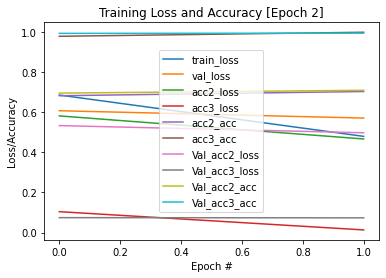

Epoch 3/10
21556/21556 [==============================] - 423s 20ms/step - loss: 0.4629 - activation_2_loss: 0.4536 - activation_3_loss: 0.0092 - activation_2_acc: 0.7063 - activation_3_acc: 0.9985 - val_loss: 0.5603 - val_activation_2_loss: 0.4849 - val_activation_3_loss: 0.0754 - val_activation_2_acc: 0.7082 - val_activation_3_acc: 0.9930


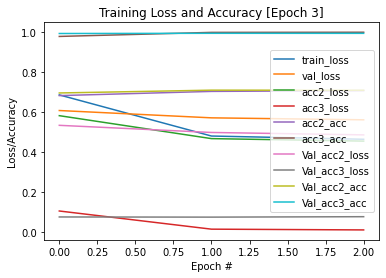

Epoch 4/10
21556/21556 [==============================] - 431s 20ms/step - loss: 0.4550 - activation_2_loss: 0.4469 - activation_3_loss: 0.0081 - activation_2_acc: 0.7078 - activation_3_acc: 0.9988 - val_loss: 0.5495 - val_activation_2_loss: 0.4830 - val_activation_3_loss: 0.0665 - val_activation_2_acc: 0.7105 - val_activation_3_acc: 0.9942


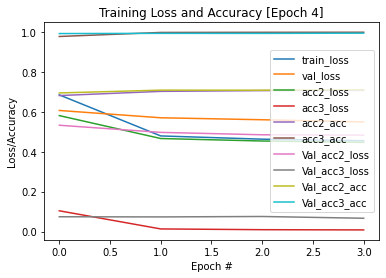

Epoch 5/10
21556/21556 [==============================] - 427s 20ms/step - loss: 0.4502 - activation_2_loss: 0.4428 - activation_3_loss: 0.0074 - activation_2_acc: 0.7090 - activation_3_acc: 0.9989 - val_loss: 0.5660 - val_activation_2_loss: 0.4820 - val_activation_3_loss: 0.0840 - val_activation_2_acc: 0.7131 - val_activation_3_acc: 0.9909


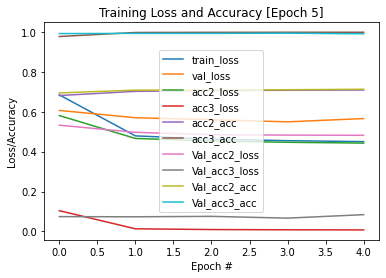

Epoch 6/10
21556/21556 [==============================] - 482s 22ms/step - loss: 0.4467 - activation_2_loss: 0.4398 - activation_3_loss: 0.0069 - activation_2_acc: 0.7095 - activation_3_acc: 0.9989 - val_loss: 0.5398 - val_activation_2_loss: 0.4657 - val_activation_3_loss: 0.0741 - val_activation_2_acc: 0.7148 - val_activation_3_acc: 0.99393s - loss: 0.4469 - activation_2_loss: 0.4400 - activation_3_loss: 0.0070


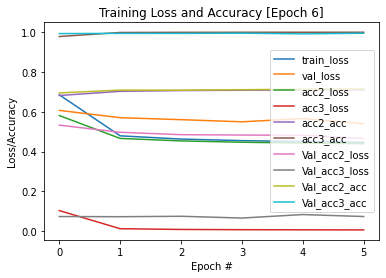

Epoch 7/10
21556/21556 [==============================] - 475s 22ms/step - loss: 0.4443 - activation_2_loss: 0.4374 - activation_3_loss: 0.0069 - activation_2_acc: 0.7104 - activation_3_acc: 0.9988 - val_loss: 0.5284 - val_activation_2_loss: 0.4604 - val_activation_3_loss: 0.0680 - val_activation_2_acc: 0.7165 - val_activation_3_acc: 0.9945


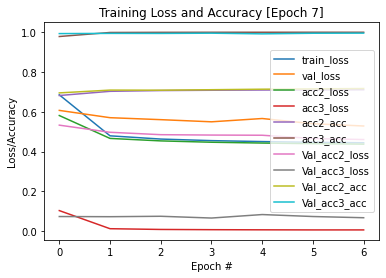

Epoch 8/10
21556/21556 [==============================] - 435s 20ms/step - loss: 0.4423 - activation_2_loss: 0.4352 - activation_3_loss: 0.0071 - activation_2_acc: 0.7109 - activation_3_acc: 0.9987 - val_loss: 0.5201 - val_activation_2_loss: 0.4536 - val_activation_3_loss: 0.0665 - val_activation_2_acc: 0.7171 - val_activation_3_acc: 0.9949


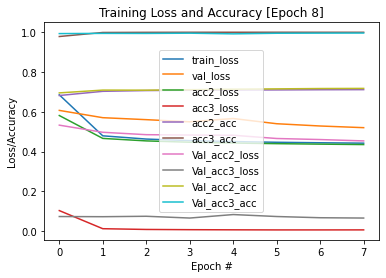

Epoch 9/10
21556/21556 [==============================] - 410s 19ms/step - loss: 0.4391 - activation_2_loss: 0.4327 - activation_3_loss: 0.0064 - activation_2_acc: 0.7117 - activation_3_acc: 0.9991 - val_loss: 0.5213 - val_activation_2_loss: 0.4498 - val_activation_3_loss: 0.0715 - val_activation_2_acc: 0.7189 - val_activation_3_acc: 0.9944vation_2_loss - ETA: 4:13 - loss: 0.4379 - activation_2_loss: 0.4332 - activation_3_loss: 0.0047 - activation_2_acc: 0.7119 - ac - ETA: 4:12 - loss: 0.4382 - activation_2_loss: 0.4336 - activation_3_loss: 0.0046 - activatio - ETA: 4:09 - loss: 0.4385 - activation_2_loss: 0.434 - ETA: 3:48 - loss: 0.4394 - activation_2_loss: 0.4344 - activati - ETA: 3:03 - loss: 0.4419 - activation_2_loss: 0.4340 - activation_3_loss: 0.0079 - - ETA: 19s - loss: 0.4393 - activation_2_loss: 0.4328 - activation_3_loss: 0.0065 - activation_2_acc: 0.7116 - activation - ETA: 18s - loss: 0.4392 - activation_2_loss: 0.43 - ETA: 12s - l - ETA: 7s - loss: 0.4391 - activa - ETA:

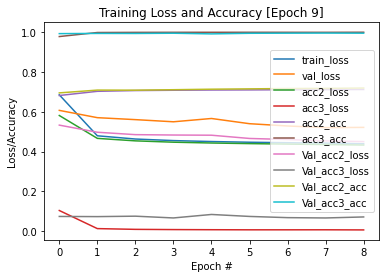

Epoch 10/10
21556/21556 [==============================] - 408s 19ms/step - loss: 0.4357 - activation_2_loss: 0.4293 - activation_3_loss: 0.0064 - activation_2_acc: 0.7122 - activation_3_acc: 0.9991 - val_loss: 0.5076 - val_activation_2_loss: 0.4372 - val_activation_3_loss: 0.0703 - val_activation_2_acc: 0.7224 - val_activation_3_acc: 0.9946vation_2_loss - ETA: 4:27 - loss: 0.4346 - activation_2_loss: 0.4277 - activation_3_loss: 0.0069 - activation_2_acc: 0. - E - ETA: 1:42 - loss: 0. - ETA - ETA: 1:27 - loss: 0.4352 - activation_2_loss: 0.4295 - activation_3_loss: 0.0057 - activation_2_acc: 0.7121 - activ - ETA: 1:26 - loss: 0.4351 - activation_2_loss: 0.4294 - activation_3_loss: 0.0057 -  - ETA: 1:23 - loss: 0.4350 - activation_2_loss: 0.42 - ETA: 53s - loss: 0.4357 - a - ETA: 50s - loss: 0. - ETA: 34s - loss: 0.4359 - activation_2_loss:  - ETA - ETA: 20s - loss: 0.4362 - activation_2_loss: 0.4295 - activation_3_loss: 0.0067 - activation_2 - ETA: 5s - loss: 0.4359 - activation_2_loss

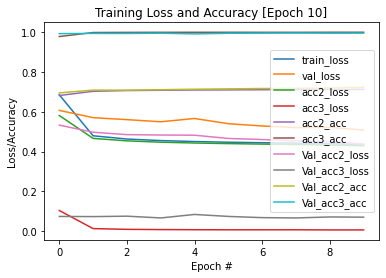

In [7]:
print("Training..................................................................")
tf.keras.utils.plot_model(model, to_file="model.png",show_layer_names=True,show_shapes=True,rankdir="TB")
history=model.fit_generator(train_generator,steps_per_epoch=int(train_generator.samples/b_size), validation_data=val_generator,validation_steps=int(val_generator.samples/b_size), max_queue_size=10, epochs=10, verbose=1, callbacks = [callbacks], workers=5)